<a href="https://colab.research.google.com/github/FRM96/TFG/blob/main/first_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Data loading 

In [3]:
'''
Loading CIFAR-10 dataset. x_train and x_test are np arrays of shape 
[50000,32,32,3] and [10000,32,32,3] respectively. y_train and y_test are 
np arrays of shape [50000,1] and [10000,1], respecectively. 
(Containing the integer labels 0-9 for the class of each image).
'''
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

NUM_CLASSES = 10
IMG_SHAPE = (x_train.shape[1],x_train.shape[2],x_train.shape[3])

print("x_train shape: "+str(x_train.shape))
print("x_test shape: "+str(x_test.shape))
print("y_train shape: "+str(y_train.shape))
print("y_test shape: "+str(y_test.shape))

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


In [4]:
'''
We are going to work with (-1,1) range values. The image data consists of 
integers between 0 and 255 for each pixel channel, so we need to divide by 255.
'''
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
'''
We also need to change the integer labeling of the images to One-Hot-Encoded 
vectors. If the class label of an image is i, One-Hot-Encoding is a vector of 
length 10, with 0s in all, except at the ith element, which is 1.
Now, y_train and y_test are therefore [50000,10] and [10000,10] respectively.
'''
y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)

# Building the Model

In [5]:
# We are going to use the Functional API

from keras.layers import Input, Flatten, Dense
from keras.models import Model

'''
This is our entry point into the network. We need to tell the network 
the shape o feach data element to expect as a tuple. 
IMG_SHAPE = (32,32,3)
'''

input_layer = Input(IMG_SHAPE) 

'''
We flatten the input into a vecor, using Flaten layer, 
with length 3072 (= 32x32x3). The reason we do this is because de subsequent 
Dense layer requieres flat inputs, not a mulidimensional array. 
Other layers types requiere multidimensional arrays as input. 
'''

x = Flatten()(input_layer)

'''
The Dense layer is perhaps the most fundamental layer type in any 
neural network. It contains a given number of unis that  are densely connected 
to the previous layer. Every uni in the layer is coneced to every uni in the 
previous layer, through a single conecction that carries a weigth 
(which can be possitive or negative). The output from a given unit is 
the weighted  sum of the input it receives from he previous layer, whick is then 
passed through a nonlinear activation function before being sent to the 
following layer. The activation function is critical o ensure the neural 
network is able to learn complex functions and doesn't just output a linear 
combination of its input.

ReLU: 0 IF NEGATIVE ELSE y=x
LeakyReLU: y=ax IF NEGATIVE ELSE y=x
sigmoid: 1/1+e^(-x)

The softmax activation is useful if you want the total sum of the output from 
the layer equal 1, for example, for multiclass classif problems where each 
observation only belongs to exactly one class.
'''
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)
output_layer=Dense(units=10, activation='softmax')(x)
model= Model(input_layer, output_layer)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


# Compiling the Model

In [6]:
from keras.optimizers import Adam

'''
The optimizer is the algorithm that will be used to update the weights 
in the neural network based on the gradient loss function. One of the most 
commonly used and stable optimizers is Adam. In most cases, you shouldn't need 
to tweak the defaults parameters of the Adam optimizer, except the learning rate. 
The greater the learning rate, the larger the change in weights at each training 
step. We have to fin the minima of the loss function. We want to tune or adjust
this during the training.

The loss function is used by nn to compare its predicted output to ground truth. 
Its returns a single number for each observation. 
If this number is greater, the network perfomance is worse.
'''

opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Training Model

In [8]:
'''
The weights are initialized to small random values. 
At each training step, one batch of images is passed through the network
and the errors are backpropagated to update weights.
The batch_size determines how many images are in each training stepbatch.
The larger the batch size, the more stable gradient calculation, 
but the slower each training step range (32,256) recomended. 
'''

start = time.time()
model.fit(x_train # Raw data
         , y_train # One-Hot-Encoded class labels
         , batch_size = 32 # How many observations will be passed o the network at each training step
         , epochs = 10 # How many times the network will be shown the full training data
         , shuffle = True # If True, the batches will be drawn randomly without replacement 
          # from the training data at each training step.
         )


Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3434 - accuracy: 0.5222
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3271 - accuracy: 0.5285
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3117 - accuracy: 0.5328
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3006 - accuracy: 0.5380
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2870 - accuracy: 0.5397
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2713 - accuracy: 0.5478
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2579 - accuracy: 0.5523
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2474 - accuracy: 0.5571
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2335 - accuracy: 0.5601
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.225

# Evaluating the Model

In [9]:
'''
We know the model achieves a acc of 50.62% on the training set, bu how does it
perform on data it has never seen?
We can use the evaluate method provided by Keras.
Note that if the model was whessing randomly, it would achieve approximately 
10% acc (bc there are 10 classes), so 50% 
is a good result given that we have used a very basic neural network.
'''

model.evaluate(x_test,y_test)

# We can view some of the predictions on the test set using the predict method
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog' , 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test) # [1k,10] vector 10 classes prob for each observation
preds_single = CLASSES[np.argmax(preds,axis=-1)] # We convert this array of probs back into a single pred using np. 

# axis = -1 tells the function to collapse the array over the last dimension (class dimension) [1k,1]
actual_single = CLASSES[np.argmax(y_test,axis=-1)]



313/313 [==============================] - 1s 3ms/step - loss: 1.3955 - accuracy: 0.5057


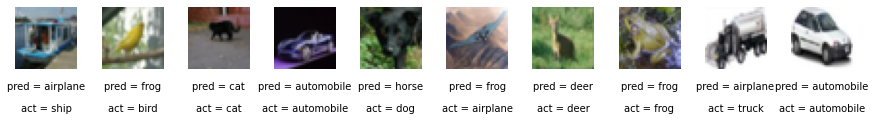

In [14]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

'''
One of the reasons our network isn't yet performing as well as it might is 
because there isn't anything in the network that takes into account the spatial
structure of the input images.
In fact, we are using a Flatten layer to flat the image into a single vector, 
so we can pass it to the first Dense layer.
To achieve this we need to use a convolutional layer.
'''

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), color='black', fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), color='black', fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)